Relatório de Classificação:

                       precision    recall  f1-score   support

              Citação       1.00      0.62      0.77         8
               Edital       0.87      0.89      0.88        70
            Intimação       0.93      0.94      0.94       151
Lista de distribuição       0.92      1.00      0.96        11

             accuracy                           0.92       240
            macro avg       0.93      0.86      0.89       240
         weighted avg       0.92      0.92      0.92       240



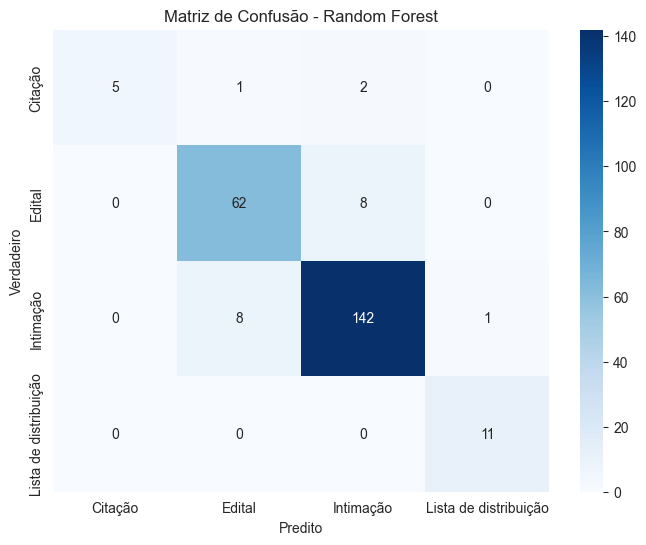

In [2]:
# Importar bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Carregar os dados tratados
df = pd.read_csv('publicacoes_pje_2024_tratado.csv')

# 2. Separar variáveis
X = df['texto']
y = df['tipoComunicacao']

# 3. Dividir em treino e projeto aplicado 2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Vetorizar textos
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# 5. Instanciar e treinar o modelo
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# 6. Fazer previsões
y_pred = rf_model.predict(X_test_tfidf)

# 7. Avaliar o modelo
print("Relatório de Classificação:\n")
print(classification_report(y_test, y_pred))

# 8. Matriz de confusão
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.title('Matriz de Confusão - Random Forest')
plt.show()
